In [1]:
###IMPORT LIBRARIES
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
##read the file

bike=pd.read_csv("C:\\Users\\SAI\\Desktop\\WINTER WRK\\Resume projects\\hour.csv")
bike

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,31-12-2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,31-12-2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,31-12-2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,31-12-2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [4]:
## prelim analysis and feature selection
bike_prep=bike.copy()
bike_prep=bike_prep.drop(["index","date","casual","registered"],axis=1)
bike_prep

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [5]:
##basic checks of missing values
bike_prep.isnull().sum() ##no null values in any column

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

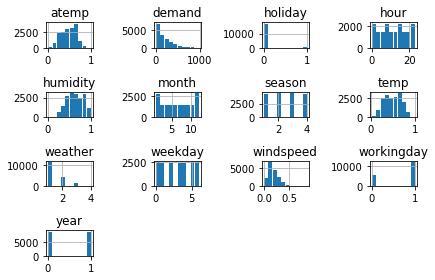

In [6]:
##visualise the data using pandas histogram

bike_prep.hist(rwidth=0.9)
plt.tight_layout()  ## here demand is not in normally distributed

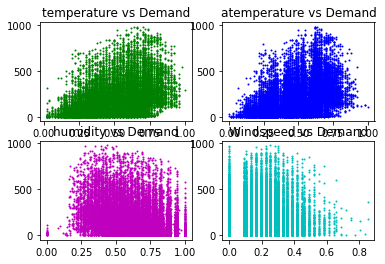

In [7]:
##visualization of continuos variable
## visualize continuous feature vs demand---- continuous var=temp, atemp, humidity , windspeed 
## visualize continuos variable vs demand 
plt.subplot(2,2,1)  ## 2 rows ,2 col ,1--1st subplot no
plt.title("temperature vs Demand")
plt.scatter(bike_prep["temp"],bike_prep["demand"],s=1,c='g')

plt.subplot(2,2,2)  ## 2 rows ,2 col ,1--1st subplot no
plt.title("atemperature vs Demand")
plt.scatter(bike_prep["atemp"],bike_prep["demand"],s=1,c='b')

plt.subplot(2,2,3)  ## 2 rows ,2 col ,1--1st subplot no
plt.title("humidity vs Demand")
plt.scatter(bike_prep["humidity"],bike_prep["demand"],s=1,c='m')

plt.subplot(2,2,4)  ## 2 rows ,2 col ,1--1st subplot no
plt.title("Windspeed vs Demand")
plt.scatter(bike_prep["windspeed"],bike_prep["demand"],s=1,c='c')


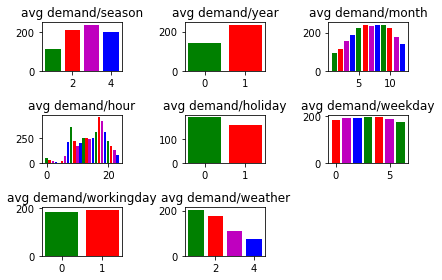

In [8]:
### visualize the demand wrt each categorical variables
plt.subplot(3,3,1)
plt.title("avg demand/season")
cat_list=bike_prep["season"].unique()
cat_average=bike_prep.groupby("season").mean()["demand"]
cat_average
colours=["g","r","m","b"]
plt.bar(cat_list,cat_average,color=colours)

########
plt.subplot(3,3,2)
plt.title("avg demand/year")
cat_list=bike_prep["year"].unique()
cat_average=bike_prep.groupby("year").mean()["demand"]
cat_average
colours=["g","r","m","b"]
plt.bar(cat_list,cat_average,color=colours)
########
plt.subplot(3,3,3)
plt.title("avg demand/month")
cat_list=bike_prep["month"].unique()
cat_average=bike_prep.groupby("month").mean()["demand"]
cat_average
colours=["g","r","m","b"]
plt.bar(cat_list,cat_average,color=colours)
######3
plt.subplot(3,3,4)
plt.title("avg demand/hour")
cat_list=bike_prep["hour"].unique()
cat_average=bike_prep.groupby("hour").mean()["demand"]
cat_average
colours=["g","r","m","b"]
plt.bar(cat_list,cat_average,color=colours)
##
plt.subplot(3,3,5)
plt.title("avg demand/holiday")
cat_list=bike_prep["holiday"].unique()
cat_average=bike_prep.groupby("holiday").mean()["demand"]
cat_average
colours=["g","r","m","b"]
plt.bar(cat_list,cat_average,color=colours)
###
plt.subplot(3,3,6)
plt.title("avg demand/weekday")
cat_list=bike_prep["weekday"].unique()
cat_average=bike_prep.groupby("weekday").mean()["demand"]
cat_average
colours=["g","r","m","b"]
plt.bar(cat_list,cat_average,color=colours)
###
plt.subplot(3,3,7)
plt.title("avg demand/workingday")
cat_list=bike_prep["workingday"].unique()
cat_average=bike_prep.groupby("workingday").mean()["demand"]
cat_average
colours=["g","r","m","b"]
plt.bar(cat_list,cat_average,color=colours)
###
plt.subplot(3,3,8)
plt.title("avg demand/weather")
cat_list=bike_prep["weather"].unique()
cat_average=bike_prep.groupby("weather").mean()["demand"]
cat_average
colours=["g","r","m","b"]
plt.bar(cat_list,cat_average,color=colours)
plt.tight_layout()

### here we can see weekdays and demand has hardly any relation so drop it
#avg demnad/year also doesn't make any sense
## drop working day variable as it's shows very little significance for demand

In [9]:
## demand is not normally distributted
## temp vs demand have to be direclty correlated
## plot for temp and atemp looks similar--so check multicollnearity bw temp and atemp
## windspeed and humidity effect d demand but needs more statistical analysis
## year wise demand is not considered due to limited number of years

In [10]:
### Check for outliers
bike_prep["demand"].describe()
bike_prep["demand"].quantile([0.05,0.1,0.15,0.9,0.95,0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

In [11]:
##test the multicollinearity\
##for this get the correlation coeff for continuous variable
correlation=bike_prep[["temp","atemp","humidity","windspeed","demand"]].corr()
correlation ## temp and atemp have high collinearity so drop atemp ##drop windspeed as it is not correlated with demand
#independent variables hsould not be correlated with each  other

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


In [12]:
bike_prep=bike_prep.drop(['atemp',"windspeed","weekday","year"],axis=1)


(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474824, 0.4704966 , 0.4962292 , 0.4940417 , 0.46796042,
        0.47732154, 0.52675885, 0.5914588 , 0.65201724, 0.71519715,
        0.805912  , 0.9253118 , 1.        , 0.9253118 , 0.805912  ,
        0.71519715, 0.65201724, 0.5914588 , 0.52675885, 0.47732154,
        0.46796042, 0.4940417 , 0.4962292 , 0.4704966 , 0.45474824],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x2cc16fadb50>)

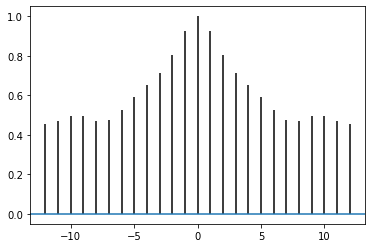

In [13]:
####### CHECK AUTOCORRELATION## to check autocorrelation value should be float not integer
df1=pd.to_numeric(bike_prep["demand"],downcast="float")
plt.acorr(df1,maxlags=12) ##bz we are dealing with 24hr so take 12
##it has high correlation upto 5 values 
## so atlst take  top 3 autocorrelation as it's high autocorrelated 
##autocorrelated exist with demand/dependent variable 

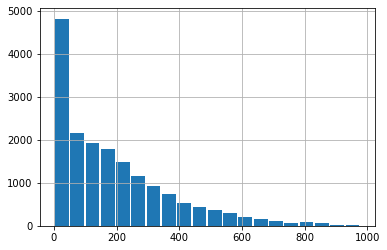

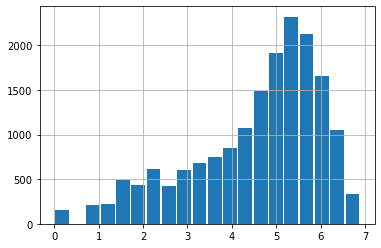

In [14]:
## demand is not normally distributed
#by seeing the graph we can say demand shows log-normal distributions==
#LND is where log of actual record shows the property of normal distribution
df1=bike_prep["demand"]
df2=np.log(df1)
plt.figure()
df1.hist(rwidth=0.9,bins=20)

##
plt.figure()
df2.hist(rwidth=0.9,bins=20)
## df2 looks normally distributed ,just it's left skewed that's because outliers on lower side 
#that means higher demand after 1am in morning


In [15]:
## so now replace demand value with logrethemic demand value 
bike_prep["demand"]=np.log(bike_prep["demand"])

In [16]:
## solving the problem of Autocorrelation for demand
t1=bike_prep["demand"].shift(+1).to_frame()
t1.columns=["t-1"]
#
t2=bike_prep["demand"].shift(+2).to_frame()
t2.columns=["t-2"]
#
t3=bike_prep["demand"].shift(+3).to_frame()
t3.columns=["t-3"]
bike_prep_lag=pd.concat([bike_prep,t1,t2,t3],axis=1)
bike_prep_lag=bike_prep_lag.dropna()### means along with these independent variables now t-1,t-2,t-3 is also taken as independent variable and used
#to calculate d dependent variable demand
bike_prep_lag

,season,month,hour,holiday,workingday,weather,temp,humidity,demand,t-1,t-2,t-3
3,1,1,3,0,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,1,2,0.26,0.60,4.779123,4.804021,5.099866,5.365976
17375,1,12,20,0,1,2,0.26,0.60,4.488636,4.779123,4.804021,5.099866
17376,1,12,21,0,1,1,0.26,0.60,4.499810,4.488636,4.779123,4.804021
17377,1,12,22,0,1,1,0.26,0.56,4.110874,4.499810,4.488636,4.779123


In [17]:
### Create dummy variable## and drop d first to avoid dummy variable trap
dummy_df=pd.get_dummies(bike_prep_lag,drop_first=True)#--dummy will not be created 
#bike_prep_lag.dtypes
dummy_df
## for dummy to work we need features to be categorical
bike_prep_lag["season"]=bike_prep_lag["season"].astype("category")
bike_prep_lag["holiday"]=bike_prep_lag["holiday"].astype("category")
bike_prep_lag["weather"]=bike_prep_lag["weather"].astype("category")
bike_prep_lag["month"]=bike_prep_lag["month"].astype("category")
bike_prep_lag["hour"]=bike_prep_lag["hour"].astype("category")

bike_prep_lag=pd.get_dummies(bike_prep_lag,drop_first=True)


In [18]:
bike_prep_lag

,workingday,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0.26,0.60,4.779123,4.804021,5.099866,5.365976,0,0,0,...,0,1,0,0,0,0,0,1,0,0
17375,1,0.26,0.60,4.488636,4.779123,4.804021,5.099866,0,0,0,...,0,0,1,0,0,0,0,1,0,0
17376,1,0.26,0.60,4.499810,4.488636,4.779123,4.804021,0,0,0,...,0,0,0,1,0,0,0,0,0,0
17377,1,0.26,0.56,4.110874,4.499810,4.488636,4.779123,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [19]:
### train_test split for tym series
#here demand is time dependent -time series data set
#If there is no autocorrelation in target variable use random selection for train and test 
# but if it's time dependent we can't do random selection for training and testing split bz it will loose autocorrelation property

x=bike_prep_lag.drop(["demand"],axis=1)
y=bike_prep_lag[["demand"]]
## create train size 
tr_size=0.7*len(x)
## let's convert to int as it's float
tr_size=int(tr_size)
x_train=x.values[0:tr_size]
x_test=x.values[tr_size:len(x)]
#
y_train=y.values[0:tr_size]
y_test=y.values[tr_size:len(y)]

#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test=(x,y,test_size=0.3,random_state=1234)

In [20]:
## FIT AND SCORE D MODEL
from sklearn.linear_model import LinearRegression
std_reg=LinearRegression()
std_reg.fit(x_train,y_train)
r2_train=std_reg.score(x_train,y_train)
r2_test=std_reg.score(x_test,y_test)
# Create y_prediction
y_predict=std_reg.predict(x_test)
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(y_test,y_predict))
rmse

0.3809845873774129

In [21]:
### RMSLE =ROOT MEAN SQUARED LOG -THIS is used when data have large values and very small values -means have high variation in data
# RMSLE -used when predicted value can never be -ve

### RMSLE CALCULATION
## as we remember we converted numeric target variable to logrithemic value -hence now we need to reconcert that again
# convert test data to numeric/integer/float
y_test_e=[]
y_predict_e=[]
for i in range(0,len(y_test)):
    y_test_e.append(math.exp(y_test[i]))
    y_predict_e.append(math.exp(y_predict[i]))
## DO the sum of logs and squares
log_sq_sum=0.0
for i in range(0,len(y_test_e)):
    log_a =math.log(y_test_e[i]+1)
    log_p =math.log(y_predict_e[i]+1)
    
    log_diff=(log_p-log_a)**2
    log_sq_sum=log_sq_sum+log_diff
    
rmsle=math.sqrt(log_sq_sum/len(y_test))
print("")
print(rmsle)



0.35600272694277435
